In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.signal import find_peaks
import os

In [2]:
# Define the function to read .s2p files and process them into a DataFrame
def read_s2p_file(file_path):
    with open(file_path, 'r') as file:
        lines = file.readlines()
    
    # Skip headers and comments (lines starting with # or !)
    data = [line.strip().split() for line in lines if not (line.startswith('#') or line.startswith('!'))]
    
    # Convert to DataFrame
    df = pd.DataFrame(data, columns=[
        'Frequency (Hz)', 'S11 (dB)', 'S11 (Angle)', 
        'S21 (dB)', 'S21 (Angle)', 'S12 (dB)', 
        'S12 (Angle)', 'S22 (dB)', 'S22 (Angle)'
    ])
    
    # Convert all values to numeric
    df = df.apply(pd.to_numeric)
    
    return df

# Analisis inicial de citi1_p12_preamp y una parte del p23 (29/10)

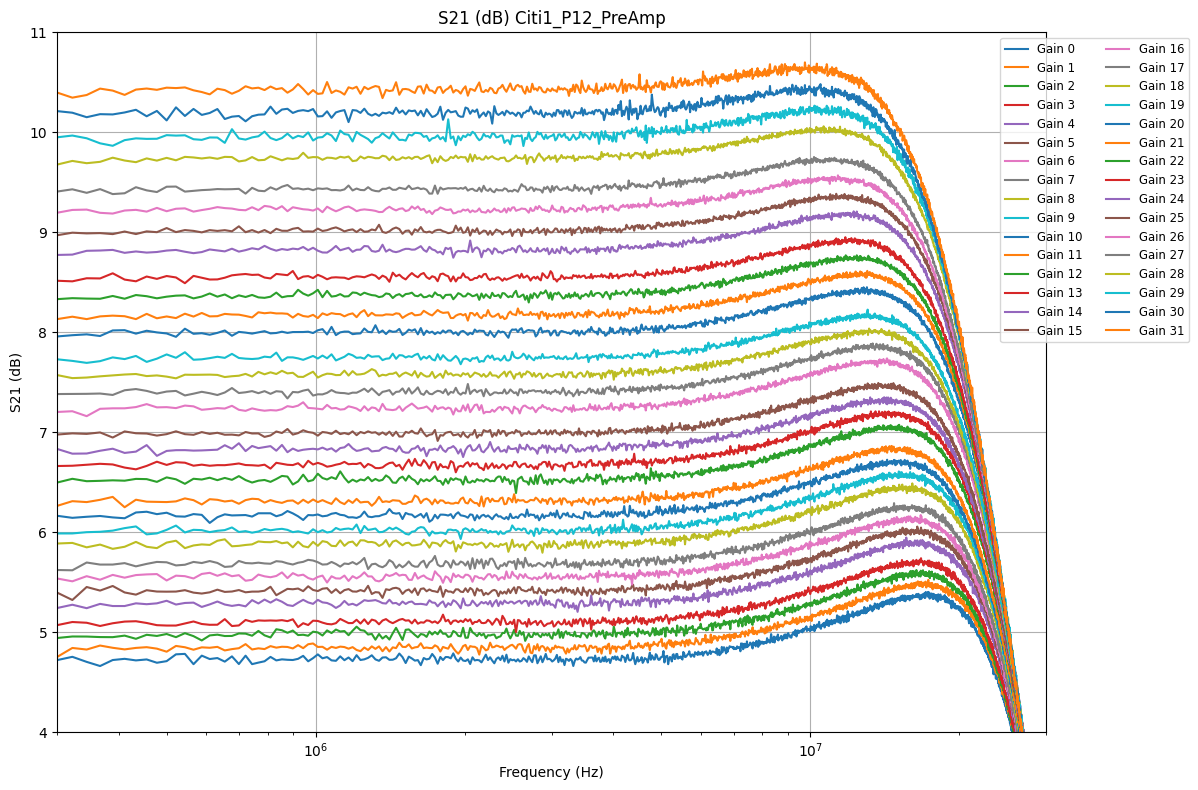

In [3]:
# Directory containing the .s2p files
directory_citi1_p12_preamp = r'/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Mediciones/Mediciones CITI VNA/2024-10-29/Citi1-P12-PreAmp'

# Loop through each file, read data, and plot S21 (dB)
plt.figure(figsize=(12, 8))
for i in range(32):
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz)
    plt.plot(df_citi1_p12_preamp['Frequency (Hz)'], df_citi1_p12_preamp['S21 (dB)'], label=f'Gain {i}')

# Customize the plot
plt.xlabel('Frequency (Hz)')
#plt.ylim(4, 41)
plt.ylim(4, 11)
plt.xscale('log')
plt.ylabel('S21 (dB)')
#plt.xlim(3e5, 3e7)
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Citi1_P12_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()


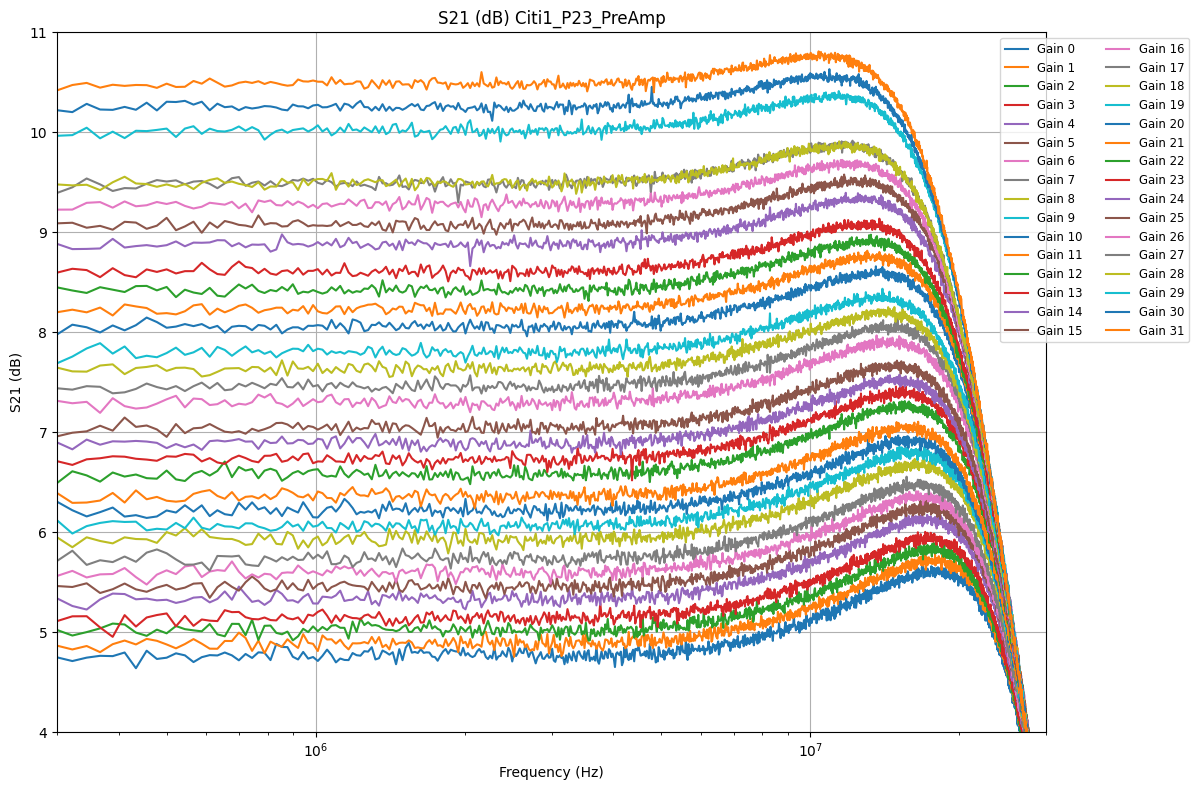

In [4]:
# Directory containing the .s2p files
directory_citi1_p23_preamp = r'/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Mediciones/Mediciones CITI VNA/2024-10-29/Citi1-P23-PreAmp'

# Loop through each file, read data, and plot S21 (dB)
plt.figure(figsize=(12, 8))
for i in range(32):
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz)
    plt.plot(df_citi1_p23_preamp['Frequency (Hz)'], df_citi1_p23_preamp['S21 (dB)'], label=f'Gain {i}')

# Customize the plot
plt.xlabel('Frequency (Hz)')
#plt.ylim(4, 41)
plt.ylim(4, 11)
plt.xscale('log')
plt.ylabel('S21 (dB)')
#plt.xlim(3e5, 3e7)
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Citi1_P23_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()


Tengo que volver a hacer el de ganancia 28, porque evidentemente no lo modifique correctamente en el config.

# Analisis comparativo inicial Citi1 - Puertos 12 y 23

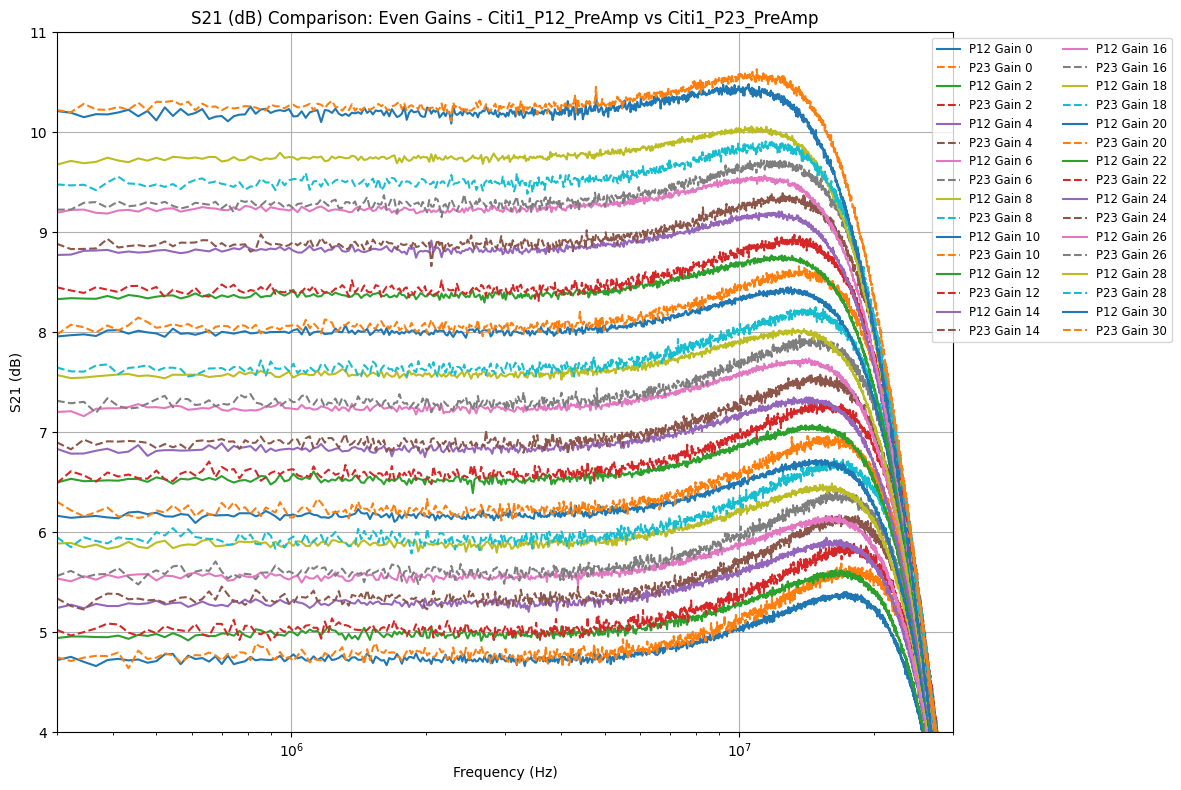

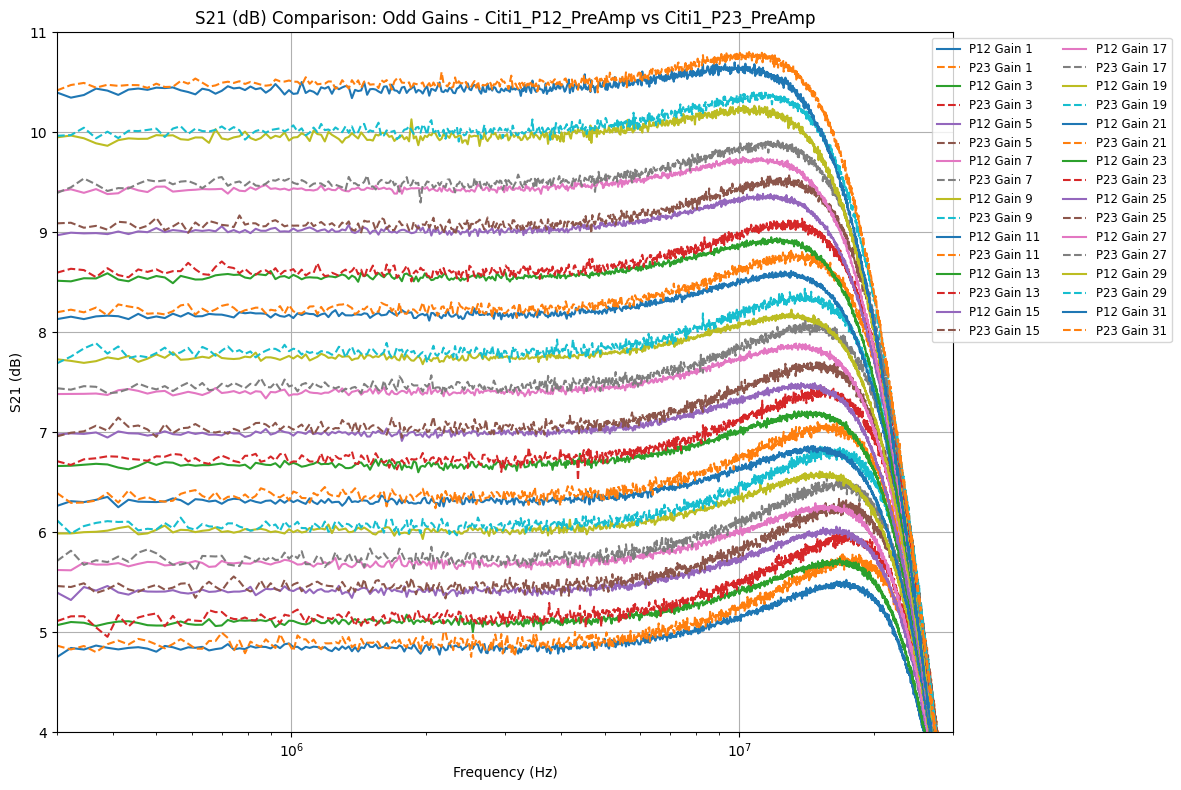

In [5]:
# Plotting for even gain indices
plt.figure(figsize=(12, 8))
for i in range(0, 32, 2):  # Even indices only
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz) for both ports in the same plot
    plt.plot(df_citi1_p12_preamp['Frequency (Hz)'], df_citi1_p12_preamp['S21 (dB)'], label=f'P12 Gain {i}')
    plt.plot(df_citi1_p23_preamp['Frequency (Hz)'], df_citi1_p23_preamp['S21 (dB)'], linestyle='--', label=f'P23 Gain {i}')

# Customize the plot for even indices
plt.xlabel('Frequency (Hz)')
plt.ylim(4, 11)
plt.xscale('log')
plt.ylabel('S21 (dB)')
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Comparison: Even Gains - Citi1_P12_PreAmp vs Citi1_P23_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()

# Plotting for odd gain indices
plt.figure(figsize=(12, 8))
for i in range(1, 32, 2):  # Odd indices only
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz) for both ports in the same plot
    plt.plot(df_citi1_p12_preamp['Frequency (Hz)'], df_citi1_p12_preamp['S21 (dB)'], label=f'P12 Gain {i}')
    plt.plot(df_citi1_p23_preamp['Frequency (Hz)'], df_citi1_p23_preamp['S21 (dB)'], linestyle='--', label=f'P23 Gain {i}')

# Customize the plot for odd indices
plt.xlabel('Frequency (Hz)')
plt.ylim(4, 11)
plt.xscale('log')
plt.ylabel('S21 (dB)')
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Comparison: Odd Gains - Citi1_P12_PreAmp vs Citi1_P23_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()

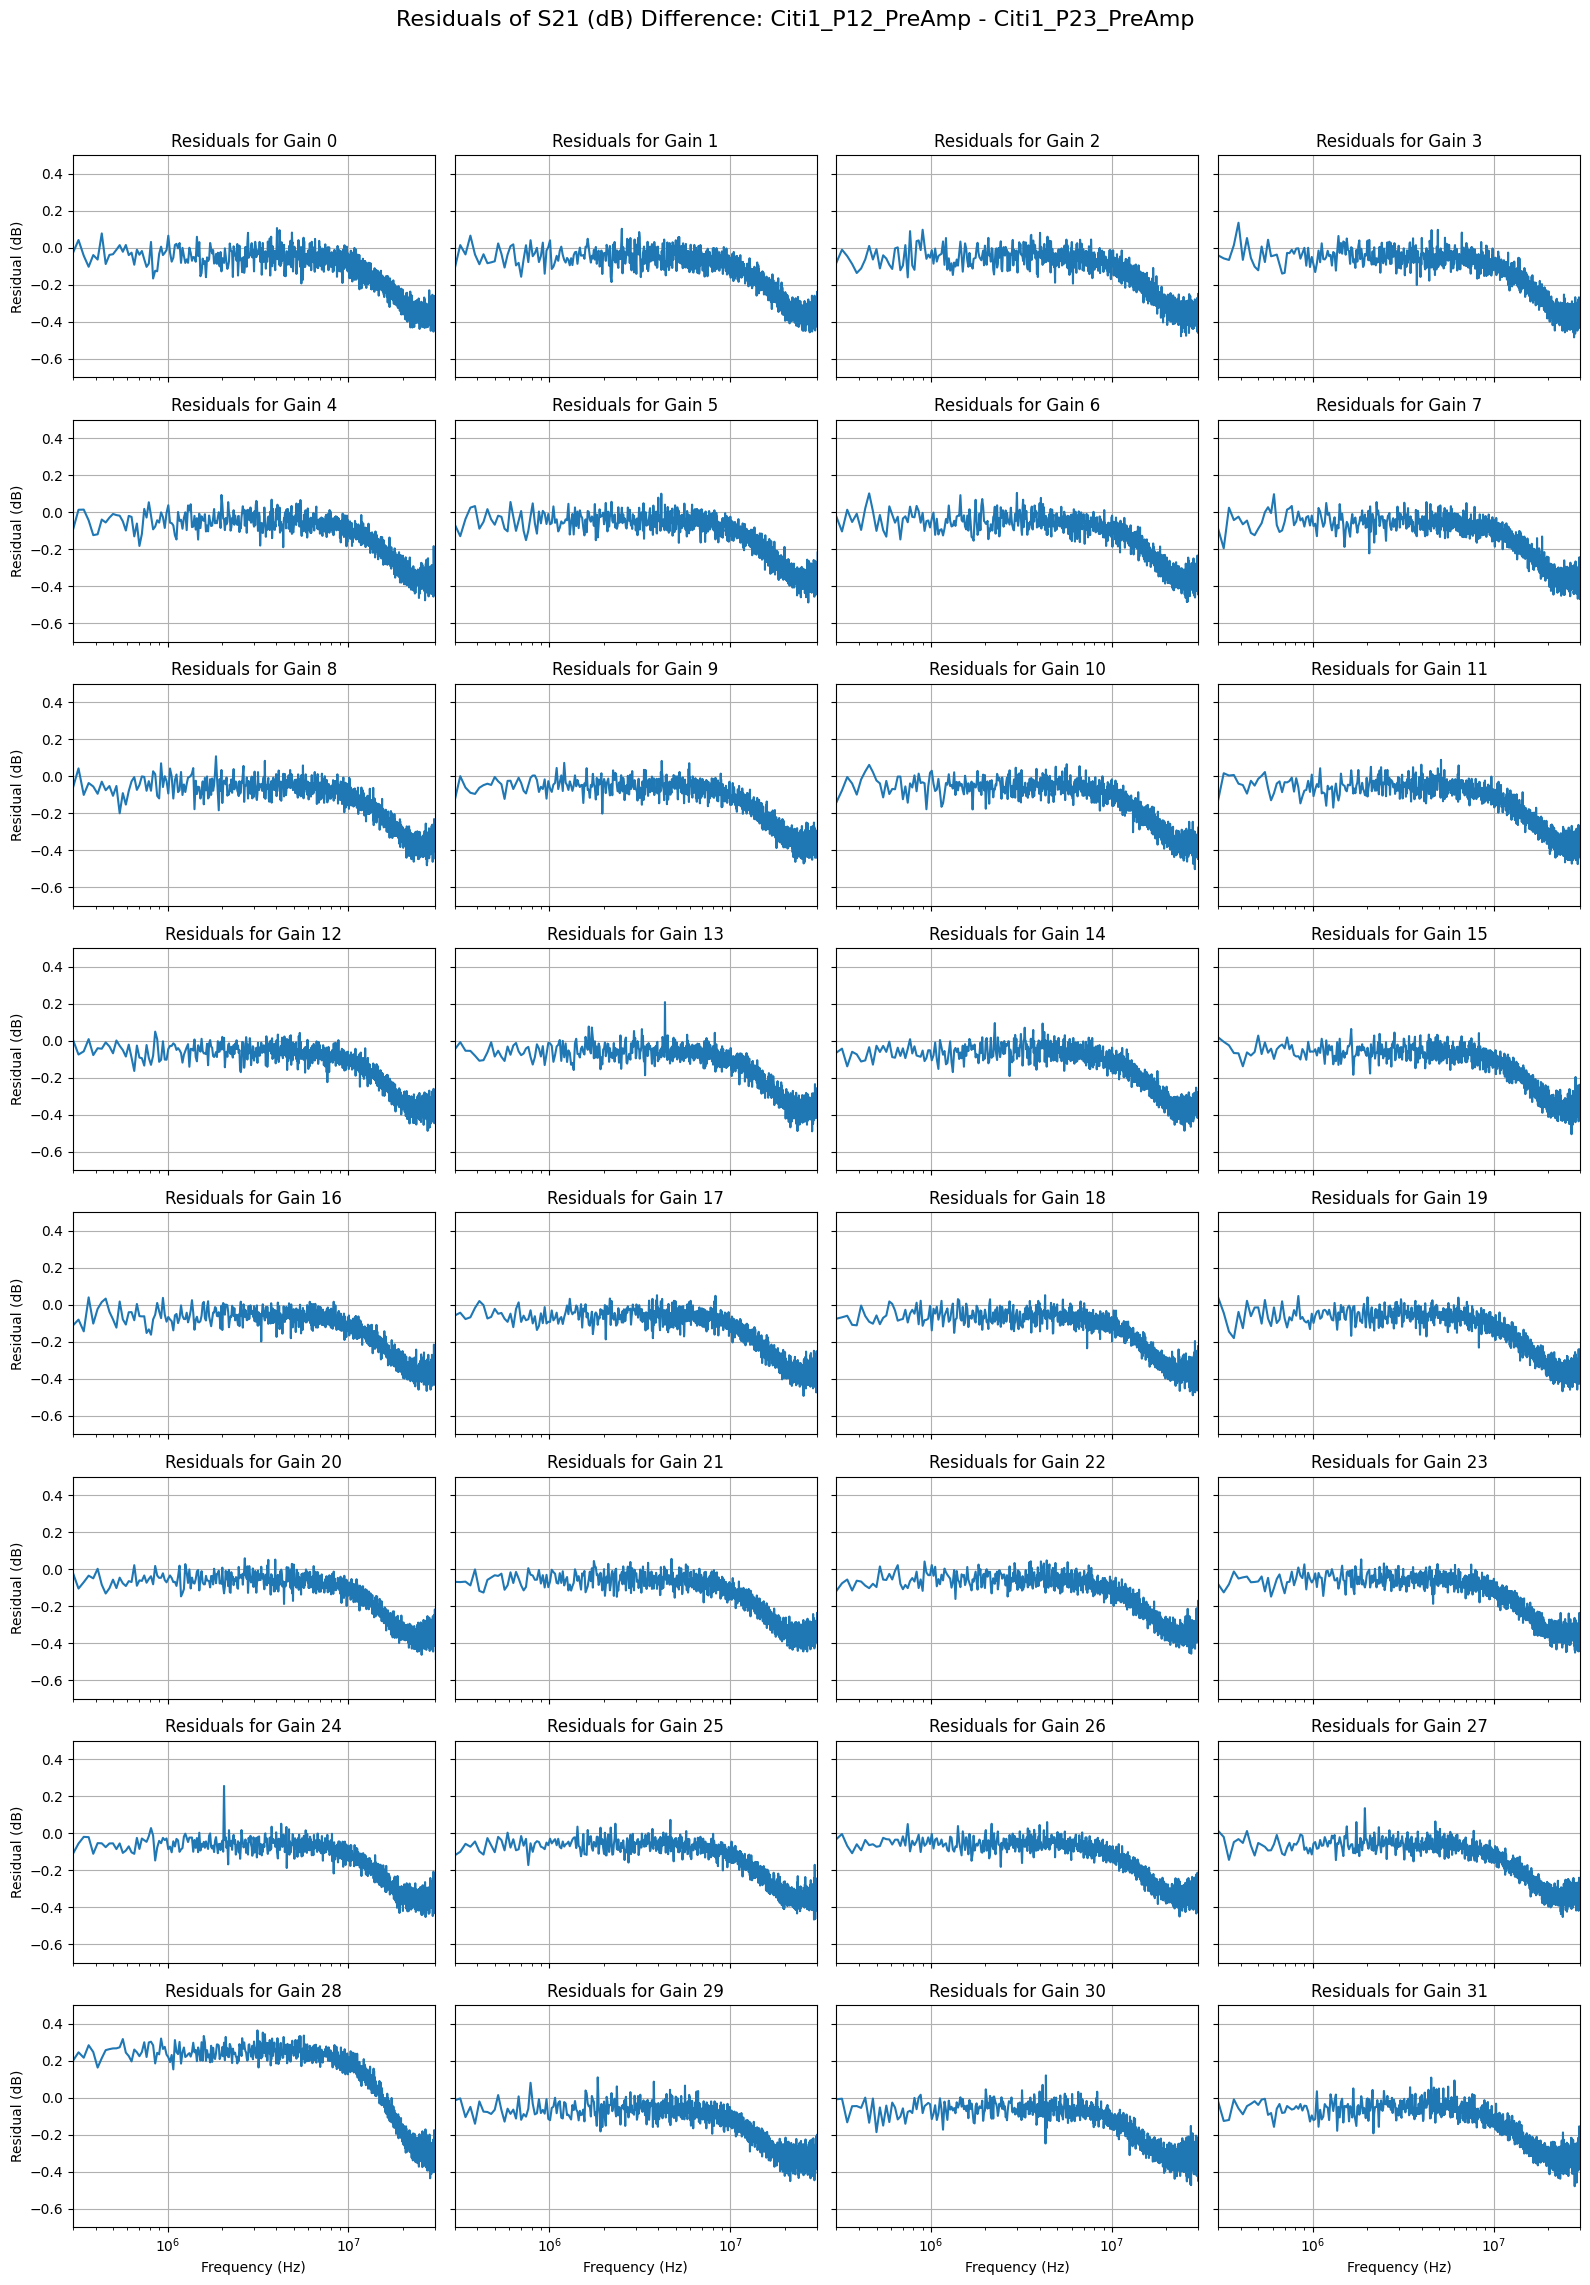

In [6]:
# Plotting residuals for all gain indices in separate subplots
fig, axes = plt.subplots(8, 4, figsize=(16, 24), sharex=True, sharey=True)
axes = axes.flatten()

for i in range(32):
    # Read data from each directory for the same gain index
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Calculate the difference (residual) between P12 and P23 for S21 (dB)
    residuals = df_citi1_p12_preamp['S21 (dB)'] - df_citi1_p23_preamp['S21 (dB)']
    
    # Plot the residuals
    axes[i].plot(df_citi1_p12_preamp['Frequency (Hz)'], residuals, label=f'Residual Gain {i}')
    axes[i].set_xscale('log')
    axes[i].grid()
    axes[i].set_xlim(3e5, 3e7)
    axes[i].set_ylim(-0.7, 0.5)
    axes[i].set_title(f'Residuals for Gain {i}')
    if i % 4 == 0:  # Only set y-label on the leftmost plots
        axes[i].set_ylabel('Residual (dB)')
    if i >= 28:  # Only set x-label on the bottom plots
        axes[i].set_xlabel('Frequency (Hz)')

# Add an overall title and adjust layout
fig.suptitle('Residuals of S21 (dB) Difference: Citi1_P12_PreAmp - Citi1_P23_PreAmp', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

No prestarle atencion a los residuos de la Ganancia 28 xq no esta bien hecha la medicion del P23

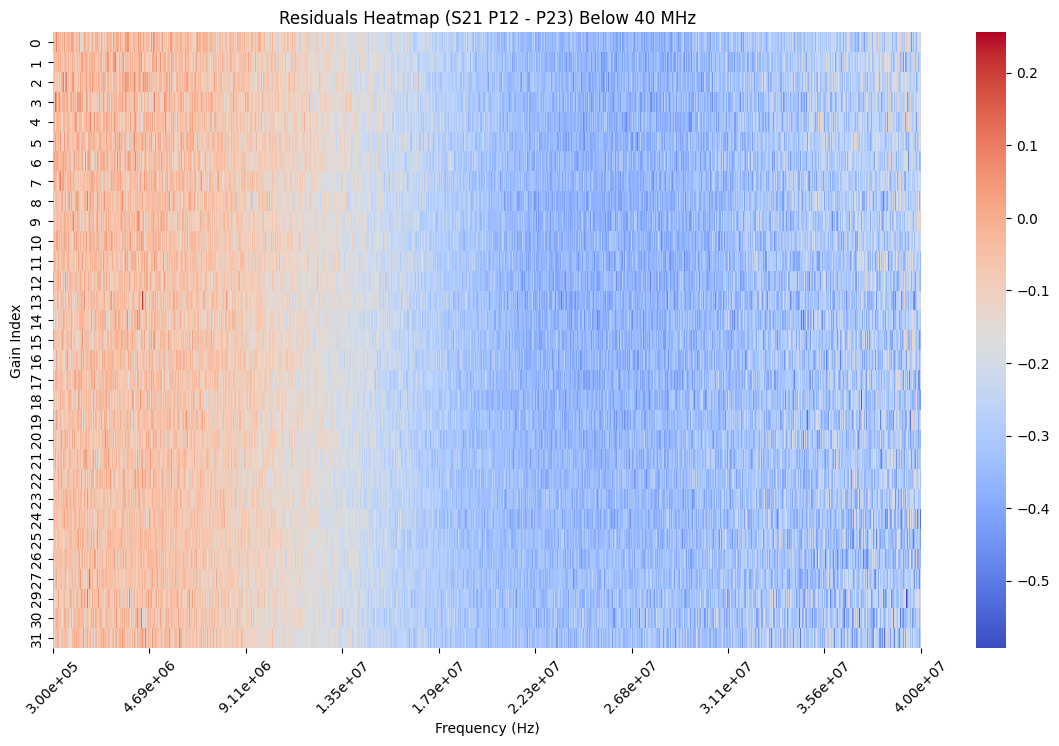

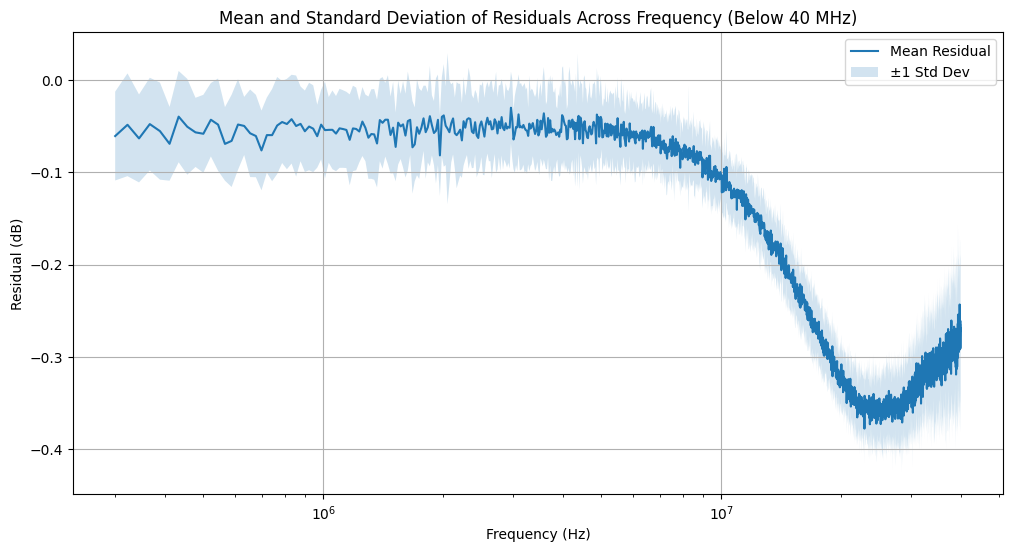

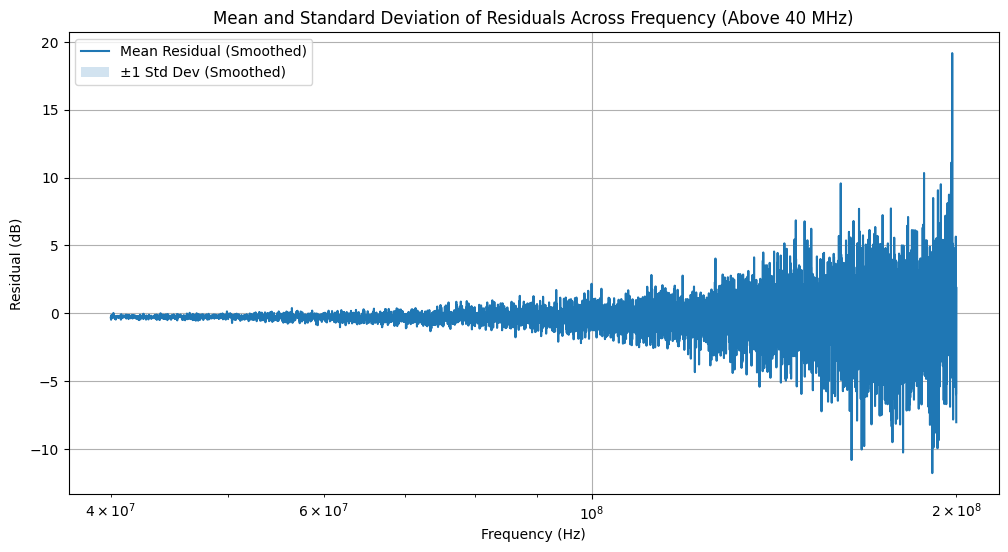

In [7]:
# Define the frequency cutoff
frequency_cutoff = 4e7  # 40 MHz

# Calculate residuals matrix up to the cutoff frequency
residuals_below_cutoff = []
frequencies_below_cutoff = []

for i in range(32):
    if i == 28:  # Skip gain 28
        continue

    # Read data for each gain setting
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Filter out frequencies above 40 MHz
    df_below_cutoff_p12 = df_citi1_p12_preamp[df_citi1_p12_preamp['Frequency (Hz)'] <= frequency_cutoff]
    df_below_cutoff_p23 = df_citi1_p23_preamp[df_citi1_p23_preamp['Frequency (Hz)'] <= frequency_cutoff]
    
    # Calculate residuals and store
    residuals_below_cutoff.append(df_below_cutoff_p12['S21 (dB)'].values - df_below_cutoff_p23['S21 (dB)'].values)
    if i == 0:
        frequencies_below_cutoff = df_below_cutoff_p12['Frequency (Hz)'].values

# Convert residuals to numpy array for easier manipulation
residuals_below_cutoff = np.array(residuals_below_cutoff)

# 1. Heatmap of residuals up to the 40 MHz cutoff, excluding gain 28
plt.figure(figsize=(14, 8))

# Define selected frequency ticks (e.g., every nth frequency)
selected_freq_indices = np.linspace(0, len(frequencies_below_cutoff) - 1, num=10, dtype=int)
selected_freq_labels = [f'{frequencies_below_cutoff[i]:.2e}' for i in selected_freq_indices]

# Define Y-axis ticks, skipping gain 28
gain_indices = [i for i in range(32) if i != 28]

sns.heatmap(residuals_below_cutoff, cmap="coolwarm", xticklabels=selected_freq_indices, yticklabels=gain_indices)
plt.xlabel('Frequency (Hz)')
plt.xticks(ticks=selected_freq_indices, labels=selected_freq_labels, rotation=45)
plt.ylabel('Gain Index')
plt.title('Residuals Heatmap (S21 P12 - P23) Below 40 MHz')
plt.show()

# 2. Mean and standard deviation of residuals up to 40 MHz
mean_residuals_below_cutoff = np.mean(residuals_below_cutoff, axis=0)
std_residuals_below_cutoff = np.std(residuals_below_cutoff, axis=0)

# Plot mean and standard deviation of residuals across frequency below 40 MHz
plt.figure(figsize=(12, 6))
plt.plot(frequencies_below_cutoff, mean_residuals_below_cutoff, label='Mean Residual')
plt.fill_between(frequencies_below_cutoff, mean_residuals_below_cutoff - std_residuals_below_cutoff,
                 mean_residuals_below_cutoff + std_residuals_below_cutoff, alpha=0.2, label='±1 Std Dev')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Residual (dB)')
plt.title('Mean and Standard Deviation of Residuals Across Frequency (Below 40 MHz)')
plt.legend()
plt.grid()
plt.show()

# Separate analysis above 40 MHz
residuals_above_cutoff = []
frequencies_above_cutoff = []

for i in range(32):
    # Filter frequencies above the cutoff
    df_above_cutoff_p12 = df_citi1_p12_preamp[df_citi1_p12_preamp['Frequency (Hz)'] > frequency_cutoff]
    df_above_cutoff_p23 = df_citi1_p23_preamp[df_citi1_p23_preamp['Frequency (Hz)'] > frequency_cutoff]
    
    # Calculate residuals for frequencies above the cutoff
    residuals_above_cutoff.append(df_above_cutoff_p12['S21 (dB)'].values - df_above_cutoff_p23['S21 (dB)'].values)
    if i == 0:
        frequencies_above_cutoff = df_above_cutoff_p12['Frequency (Hz)'].values

# Averaging or smoothing residuals above 40 MHz
mean_residuals_above_cutoff = np.mean(residuals_above_cutoff, axis=0)
std_residuals_above_cutoff = np.std(residuals_above_cutoff, axis=0)

# Plot the averaged residuals for frequencies above 40 MHz
plt.figure(figsize=(12, 6))
plt.plot(frequencies_above_cutoff, mean_residuals_above_cutoff, label='Mean Residual (Smoothed)')
plt.fill_between(frequencies_above_cutoff, mean_residuals_above_cutoff - std_residuals_above_cutoff,
                 mean_residuals_above_cutoff + std_residuals_above_cutoff, alpha=0.2, label='±1 Std Dev (Smoothed)')
plt.xscale('log')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Residual (dB)')
plt.title('Mean and Standard Deviation of Residuals Across Frequency (Above 40 MHz)')
plt.legend()
plt.grid()
plt.show()


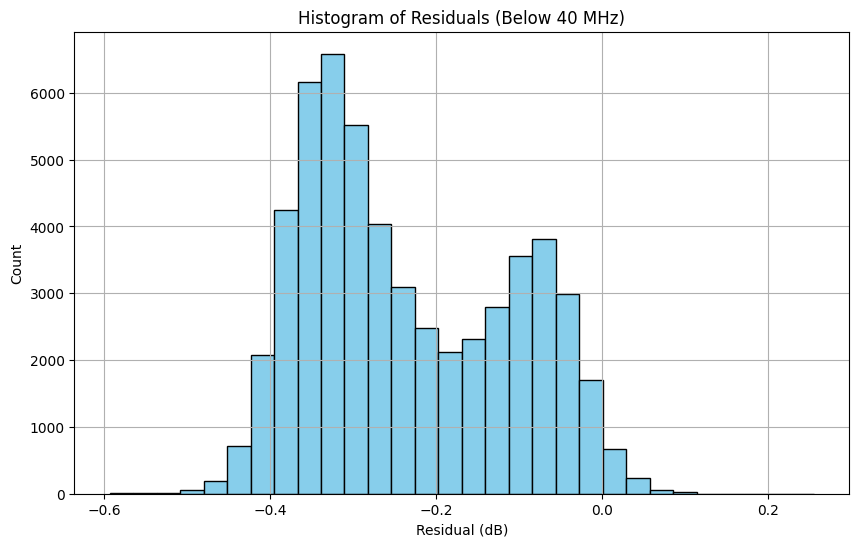

Percentage of Residuals Outside ±0.5 dB: 0.05%


In [8]:
# 4. Histogram of Residuals
plt.figure(figsize=(10, 6))
plt.hist(residuals_below_cutoff.flatten(), bins=30, color='skyblue', edgecolor='black')
plt.xlabel('Residual (dB)')
plt.ylabel('Count')
plt.title('Histogram of Residuals (Below 40 MHz)')
plt.grid()
plt.show()

# 5. Threshold for Acceptable Differences
threshold = 0.5  # dB
outliers_below_cutoff = np.abs(residuals_below_cutoff) > threshold
outlier_count = np.sum(outliers_below_cutoff)
total_points = residuals_below_cutoff.size
outlier_percentage = (outlier_count / total_points) * 100

print(f"Percentage of Residuals Outside ±{threshold} dB: {outlier_percentage:.2f}%")

In [9]:
# Prepare to store results
peak_results = []
db_drop_results = []

# Loop through each file, read data, and analyze S21 (dB)
for i in range(32):
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)

    # Get the S21 data
    frequencies = df_citi1_p12_preamp['Frequency (Hz)']
    s21_db = df_citi1_p12_preamp['S21 (dB)']

    # Find the peaks
    peaks, _ = find_peaks(s21_db, height=5, distance=500, width=100)
    
    # Store peak frequencies and their corresponding S21 values
    peak_freqs = frequencies[peaks]
    peak_values = s21_db[peaks]
    peak_results.append((i, peak_freqs, peak_values))

    # Calculate -3dB point
    flat_section = s21_db[frequencies < 3e6]  # Adjust the limit as needed
    average_flat = np.mean(flat_section)
    db_drop_threshold = average_flat - 3
    # Find frequency where S21 drops to -3dB
    drop_index = np.where(s21_db <= db_drop_threshold)[0]
    if drop_index.size > 0:
        db_drop_freq = frequencies[drop_index[0]]
        db_drop_results.append((i, db_drop_freq))

# Print results
for gain, peak_freqs, peak_values in peak_results:
    print(f'Gain {gain} Peaks: Frequencies {peak_freqs} Hz, Values {peak_values} dB')

for gain, drop_freq in db_drop_results:
    print(f'Gain {gain} -3dB Frequency: {drop_freq} Hz')

Gain 0 Peaks: Frequencies 768    1.734296e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 768    5.402428
Name: S21 (dB), dtype: float64 dB
Gain 1 Peaks: Frequencies 767    1.732077e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 767    5.523788
Name: S21 (dB), dtype: float64 dB
Gain 2 Peaks: Frequencies 725    1.638873e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 725    5.62149
Name: S21 (dB), dtype: float64 dB
Gain 3 Peaks: Frequencies 741    1.674379e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 741    5.739386
Name: S21 (dB), dtype: float64 dB
Gain 4 Peaks: Frequencies 691    1.563423e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 691    5.945905
Name: S21 (dB), dtype: float64 dB
Gain 5 Peaks: Frequencies 728    1.645531e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 728    6.055932
Name: S21 (dB), dtype: float64 dB
Gain 6 Peaks: Frequencies 740    1.672160e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 740    6.171477
Name: S21 (dB), dtype: floa

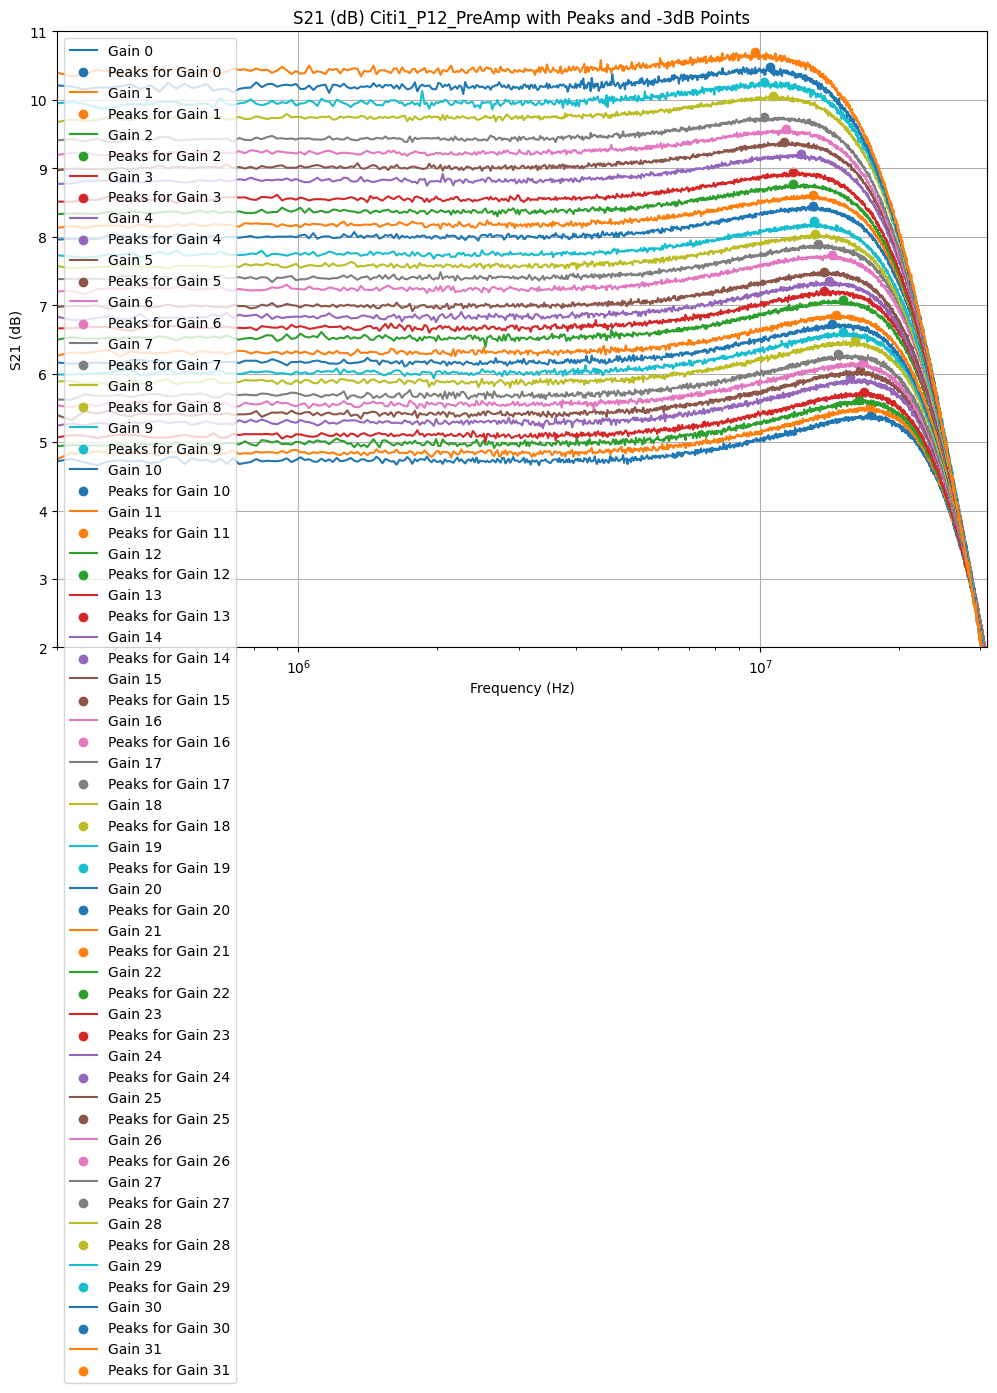

In [10]:
# Optionally plot again to visualize with peaks
plt.figure(figsize=(12, 8))
for i in range(32):
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    
    # Plot the S21 data
    plt.plot(df_citi1_p12_preamp['Frequency (Hz)'], df_citi1_p12_preamp['S21 (dB)'], label=f'Gain {i}')

    # Get the S21 data
    frequencies = df_citi1_p12_preamp['Frequency (Hz)']
    s21_db = df_citi1_p12_preamp['S21 (dB)']

    # Find the peaks
    peaks, _ = find_peaks(s21_db, height=5, distance=500, width=100)

    # Plot the peaks
    plt.scatter(frequencies[peaks], s21_db[peaks], marker='o', label=f'Peaks for Gain {i}')

plt.xscale('log')
plt.ylim(2, 11)
plt.xlim(3e5, 3.1e7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S21 (dB)')
plt.title('S21 (dB) Citi1_P12_PreAmp with Peaks and -3dB Points')
plt.legend()
plt.grid()
plt.show()


Aca intente hacer algo para la visualizacion pero no me funciono

Gain 0 Peaks: Frequencies 768    1.734296e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 768    5.402428
Name: S21 (dB), dtype: float64 dB
Gain 1 Peaks: Frequencies 767    1.732077e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 767    5.523788
Name: S21 (dB), dtype: float64 dB
Gain 2 Peaks: Frequencies 725    1.638873e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 725    5.62149
Name: S21 (dB), dtype: float64 dB
Gain 3 Peaks: Frequencies 741    1.674379e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 741    5.739386
Name: S21 (dB), dtype: float64 dB
Gain 4 Peaks: Frequencies 691    1.563423e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 691    5.945905
Name: S21 (dB), dtype: float64 dB
Gain 5 Peaks: Frequencies 728    1.645531e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 728    6.055932
Name: S21 (dB), dtype: float64 dB
Gain 6 Peaks: Frequencies 740    1.672160e+07
Name: Frequency (Hz), dtype: float64 Hz, Values 740    6.171477
Name: S21 (dB), dtype: floa

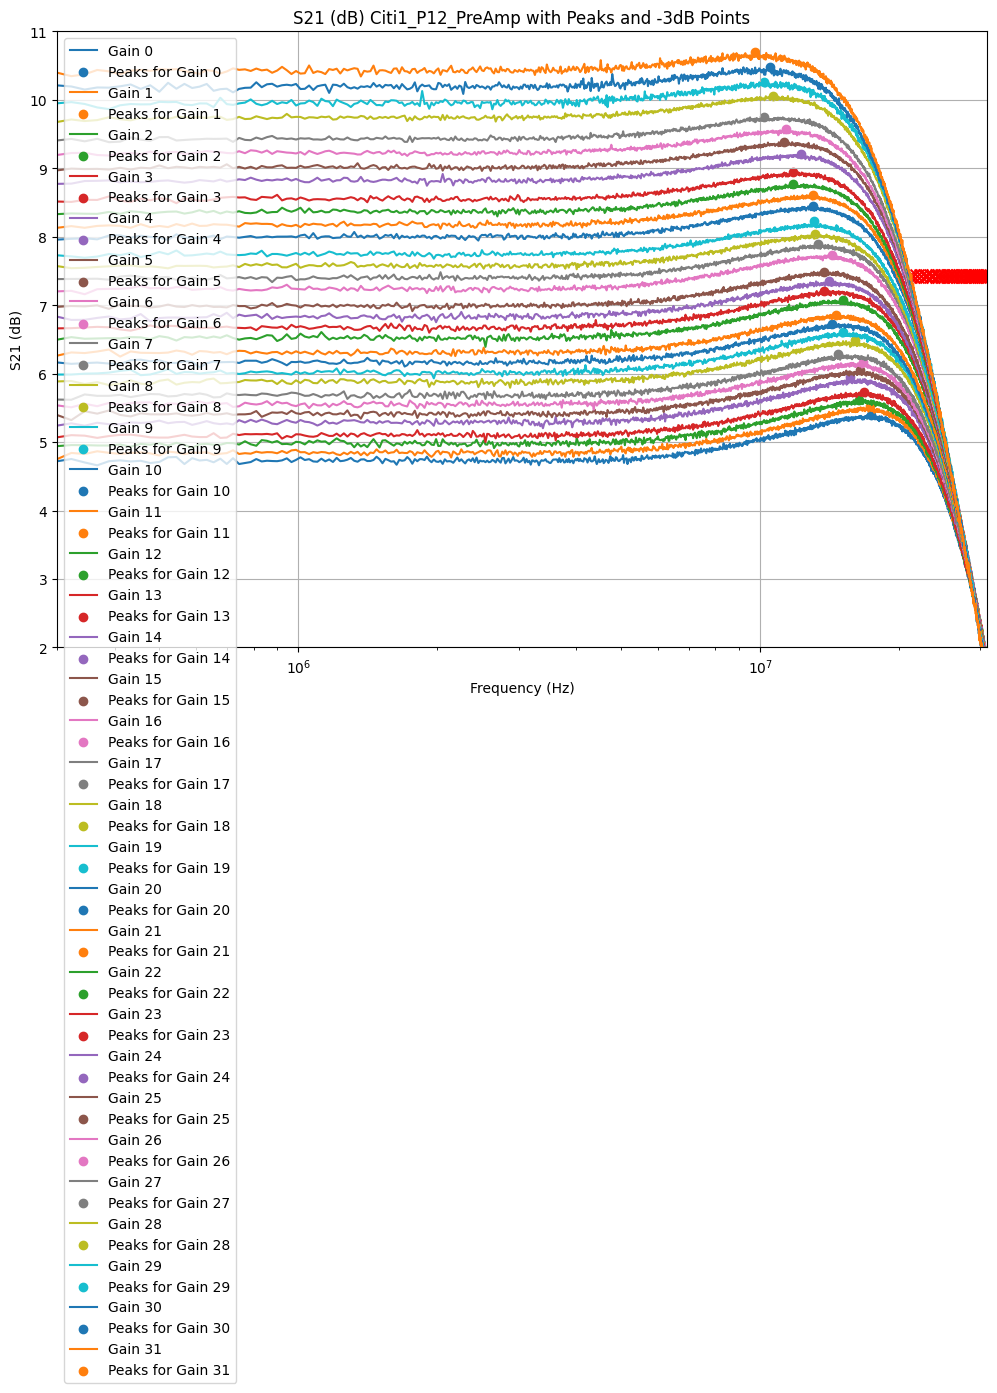

In [17]:
# Prepare to store results
peak_results = []
db_drop_results = []
# Initialize an empty list to collect the rows for the DataFrame
rows = []

# Loop through each file, read data, and analyze S21 (dB)
for i in range(32):
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)

    # Get the S21 data
    frequencies = df_citi1_p12_preamp['Frequency (Hz)']
    s21_db = df_citi1_p12_preamp['S21 (dB)']

    # Find the peaks
    peaks, _ = find_peaks(s21_db, height=5, distance=500, width=100)

    # Store peak frequencies and their corresponding S21 values
    peak_freqs = frequencies[peaks]
    peak_values = s21_db[peaks]
    peak_results.append((i, peak_freqs, peak_values))

    # Calculate -3dB point
    flat_section = s21_db[frequencies < 3e6]  # Adjust the limit as needed
    average_flat = np.mean(flat_section)
    db_drop_threshold = average_flat - 3
    # Find frequency where S21 drops to -3dB
    drop_index = np.where(s21_db <= db_drop_threshold)[0]
    if drop_index.size > 0:
        db_drop_freq = frequencies[drop_index[0]]
        db_drop_results.append((i, db_drop_freq))

# Print results
for gain, peak_freqs, peak_values in peak_results:
    print(f'Gain {gain} Peaks: Frequencies {peak_freqs} Hz, Values {peak_values} dB')

for gain, drop_freq in db_drop_results:
    print(f'Gain {gain} -3dB Frequency: {drop_freq} Hz')

# Create a list of dictionaries for the DataFrame
for i in range(32):
    peak_freqs, peak_values = peak_results[i][1], peak_results[i][2]
    drop_freq = next((df_drop_freq for gain, df_drop_freq in db_drop_results if gain == i), np.nan)
    
    for freq, value in zip(peak_freqs, peak_values):
        rows.append({
            'Gain': i,
            'Peak Frequency (Hz)': freq,
            'Peak Value (dB)': value,
            '-3dB Frequency (Hz)': drop_freq
        })

# Create DataFrame from the rows list
results_df = pd.DataFrame(rows)

# Save results to CSV
results_df.to_csv('s21_peak_and_db_drop_results.csv', index=False)

# Optionally plot again to visualize with peaks and -3 dB points
plt.figure(figsize=(12, 8))
for i in range(32):
    file_path_citi1_p12_preamp = os.path.join(directory_citi1_p12_preamp, f'ganancia_{i}.s2p')
    df_citi1_p12_preamp = read_s2p_file(file_path_citi1_p12_preamp)
    
    # Plot the S21 data
    plt.plot(df_citi1_p12_preamp['Frequency (Hz)'], df_citi1_p12_preamp['S21 (dB)'], label=f'Gain {i}')

    # Get the S21 data
    frequencies = df_citi1_p12_preamp['Frequency (Hz)']
    s21_db = df_citi1_p12_preamp['S21 (dB)']

    # Retrieve peak frequencies and values from the results
    peak_freqs, peak_values = peak_results[i][1], peak_results[i][2]
    
    # Plot the peaks
    plt.scatter(peak_freqs, peak_values, marker='o', label=f'Peaks for Gain {i}')

    # Get -3 dB frequency
    drop_freq = next((df_drop_freq for gain, df_drop_freq in db_drop_results if gain == i), np.nan)
    if not np.isnan(drop_freq):
        # Plot the -3 dB frequency as a vertical line
        #plt.axvline(x=drop_freq, color='red', linestyle='--', label=f'-3dB Frequency for Gain {i}')
        # Mark the -3 dB frequency point
        plt.scatter(drop_freq, average_flat - 3, color='red', marker='x', s=100)  # Size can be adjusted

plt.xscale('log')
plt.ylim(2, 11)
plt.xlim(3e5, 3.1e7)
plt.xlabel('Frequency (Hz)')
plt.ylabel('S21 (dB)')
plt.title('S21 (dB) Citi1_P12_PreAmp with Peaks and -3dB Points')
plt.legend()
plt.grid()
plt.show()

# Presentacion de los datos medidos el 1/11 (muy ruidosos)

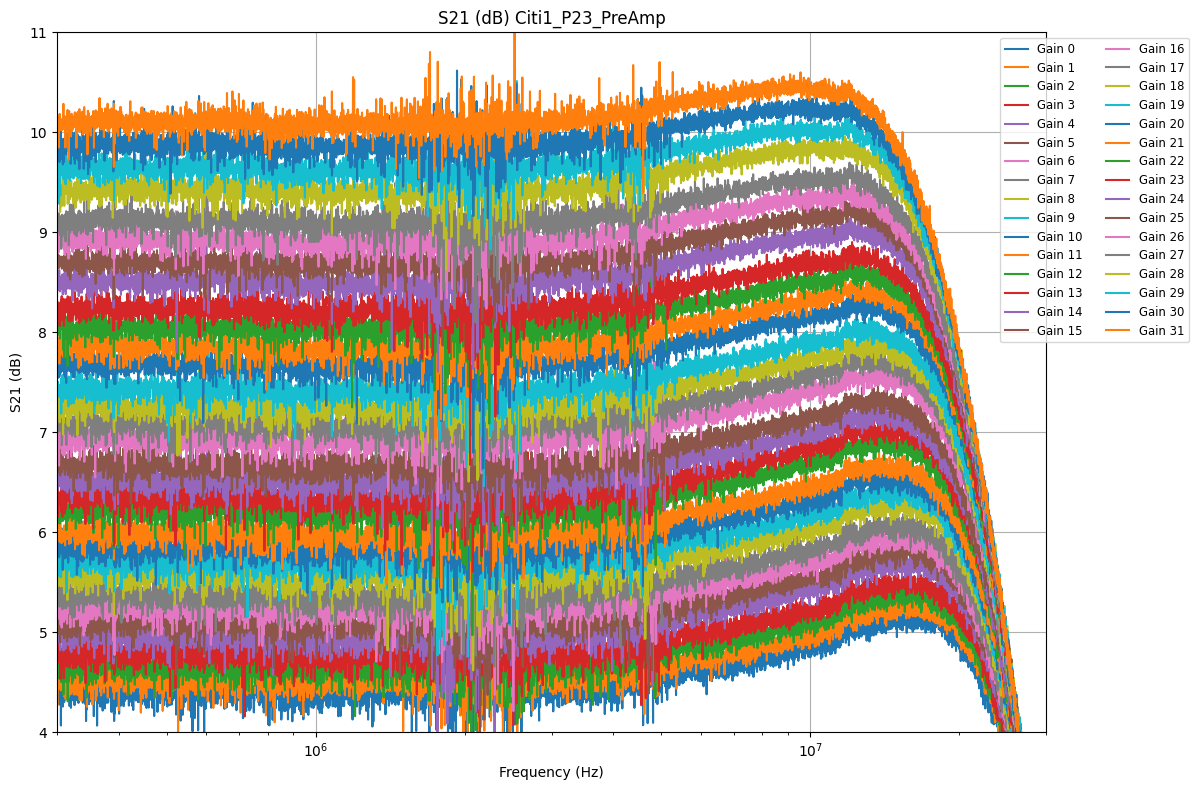

In [15]:
# Directory containing the .s2p files
directory_citi1_p23_preamp = r'/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Mediciones/Mediciones CITI VNA/2024-11-01/Citi2-P7-PreAmp'

# Loop through each file, read data, and plot S21 (dB)
plt.figure(figsize=(12, 8))
for i in range(32):
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz)
    plt.plot(df_citi1_p23_preamp['Frequency (Hz)'], df_citi1_p23_preamp['S21 (dB)'], label=f'Gain {i}')

# Customize the plot
plt.xlabel('Frequency (Hz)')
#plt.ylim(4, 41)
plt.ylim(4, 11)
plt.xscale('log')
plt.ylabel('S21 (dB)')
#plt.xlim(3e5, 3e7)
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Citi1_P23_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()


# Analisis inicial del Citi1_P23 y Citi2 puertos 7 y 28 (8/11)

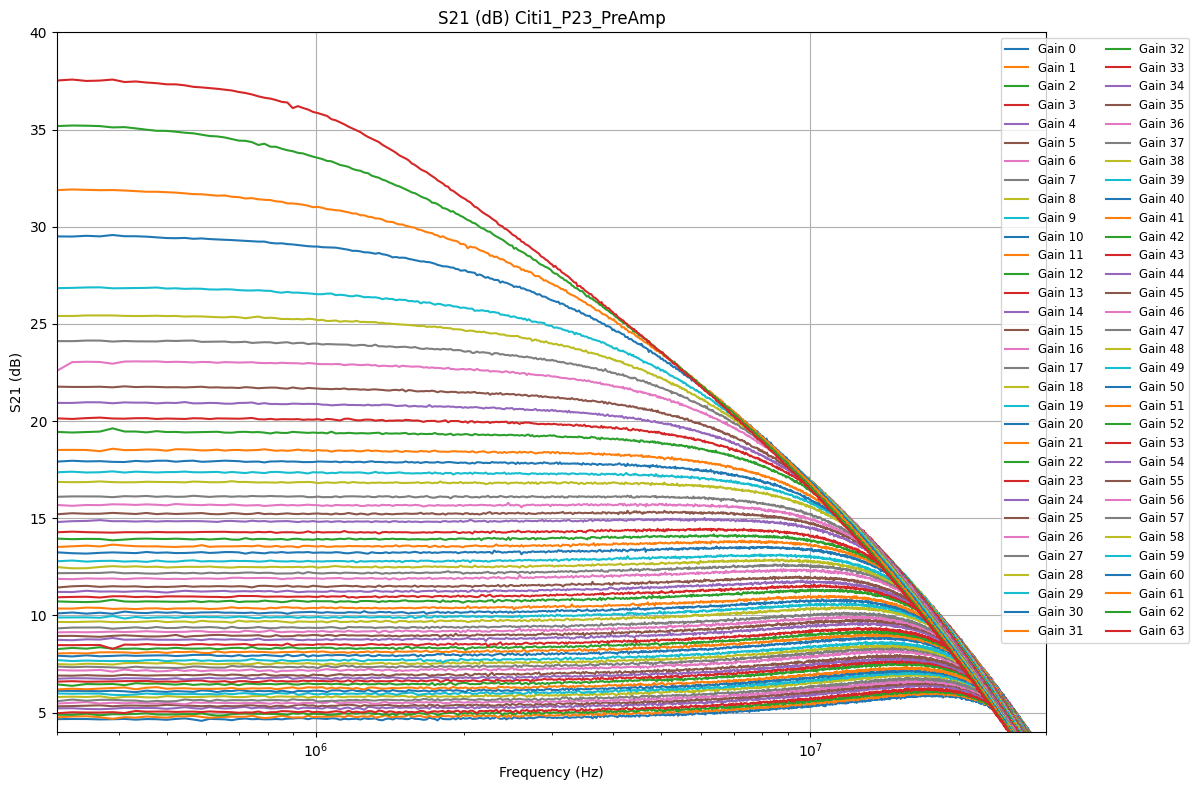

In [63]:
# Directory containing the .s2p files
directory_citi1_p23_preamp = r'/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Mediciones/Mediciones CITI VNA/2024-11-08/Citi1-P23-PreAmp'

# Loop through each file, read data, and plot S21 (dB)
plt.figure(figsize=(12, 8))
for i in range(64):
    file_path_citi1_p23_preamp = os.path.join(directory_citi1_p23_preamp, f'ganancia_{i}.s2p')
    df_citi1_p23_preamp = read_s2p_file(file_path_citi1_p23_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz)
    plt.plot(df_citi1_p23_preamp['Frequency (Hz)'], df_citi1_p23_preamp['S21 (dB)'], label=f'Gain {i}')

# Customize the plot
plt.xlabel('Frequency (Hz)')
#plt.ylim(4, 41)
plt.ylim(4, 40)
plt.ylabel('S21 (dB)')
plt.xscale('log')
#plt.xlim(3e5, 3e7)
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Citi1_P23_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()


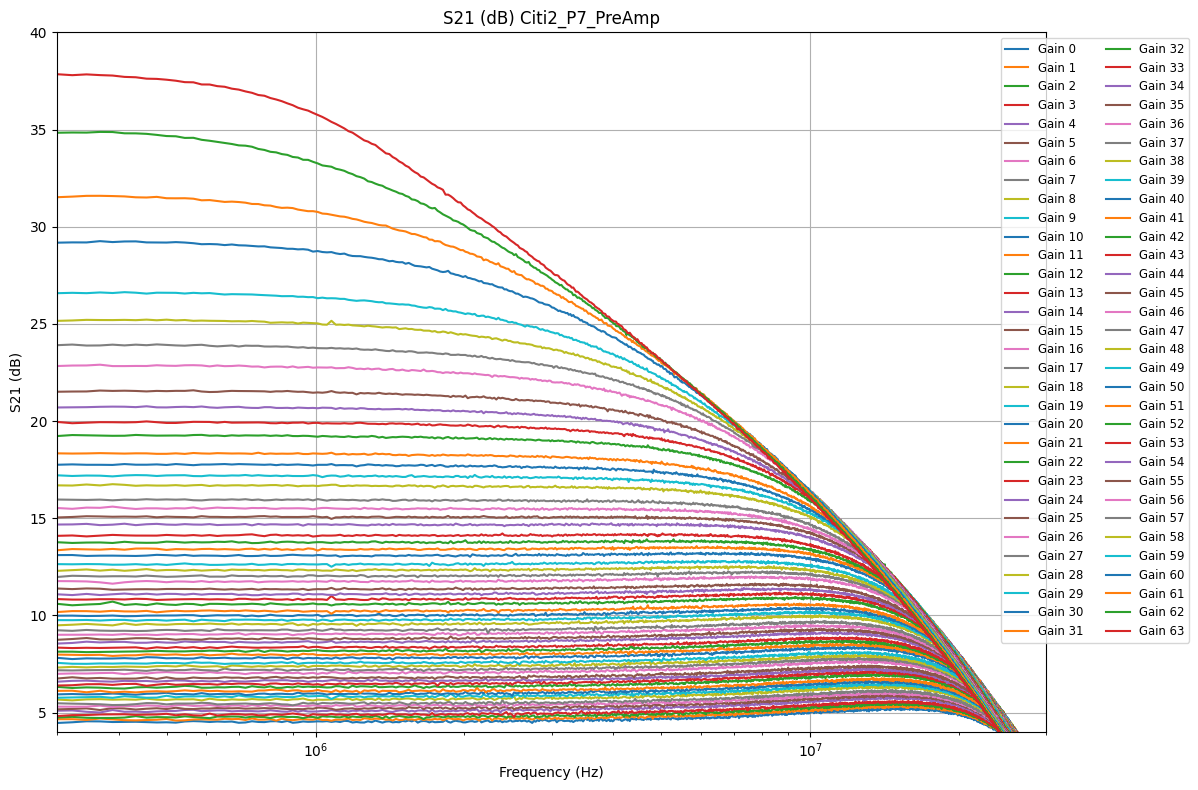

In [82]:
# Directory containing the .s2p files
directory_citi2_p7_preamp = r'/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Mediciones/Mediciones CITI VNA/2024-11-08/Citi2-P7-PreAmp'

# Loop through each file, read data, and plot S21 (dB)
plt.figure(figsize=(12, 8))
for i in range(64):
    file_path_citi2_p7_preamp = os.path.join(directory_citi2_p7_preamp, f'ganancia_{i}.s2p')
    df_citi2_p7_preamp = read_s2p_file(file_path_citi2_p7_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz)
    plt.plot(df_citi2_p7_preamp['Frequency (Hz)'], df_citi2_p7_preamp['S21 (dB)'], label=f'Gain {i}')

# Customize the plot
plt.xlabel('Frequency (Hz)')
#plt.ylim(4, 41)
plt.ylim(4, 40)
plt.ylabel('S21 (dB)')
plt.xscale('log')
#plt.xlim(3e5, 3e7)
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Citi2_P7_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()


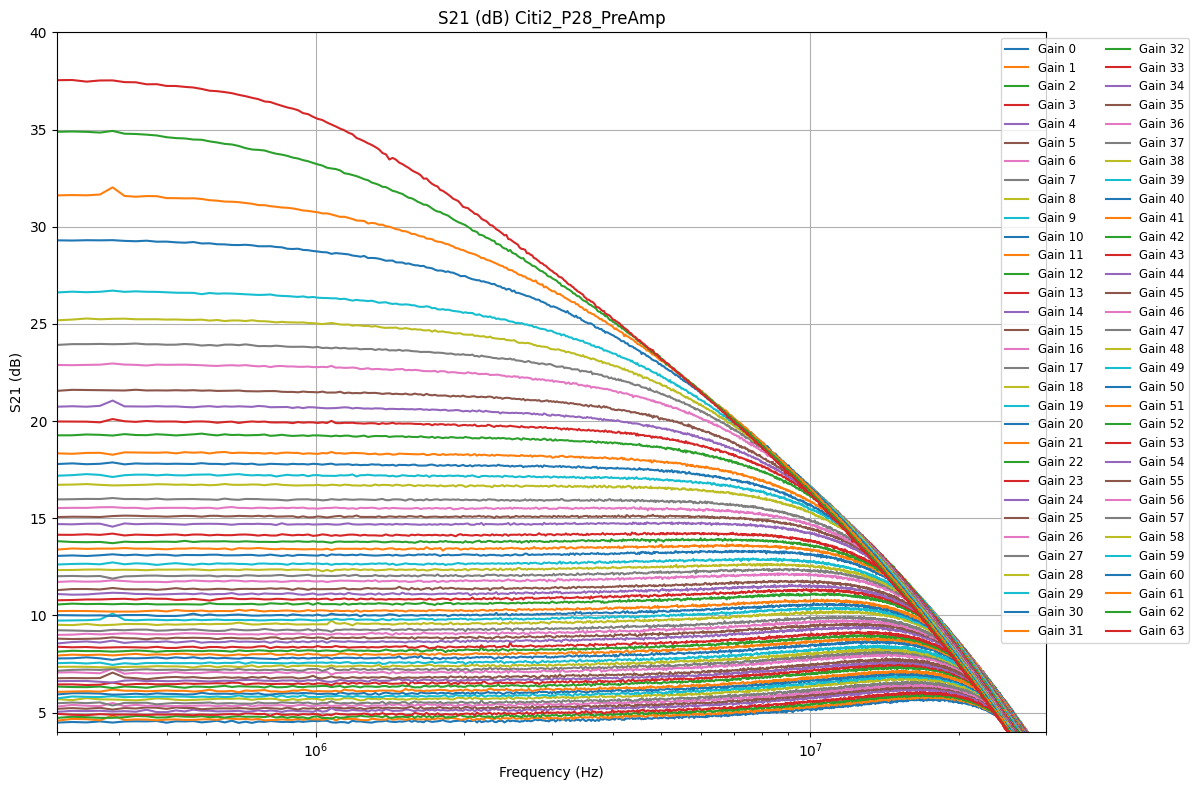

In [81]:
# Directory containing the .s2p files
directory_citi2_p28_preamp = r'/home/lautaro/GitHub/Laboratorio_6_7_ITeDA/Mediciones/Mediciones CITI VNA/2024-11-08/Citi2-P28-PreAmp'

# Loop through each file, read data, and plot S21 (dB)
plt.figure(figsize=(12, 8))
for i in range(64):
    file_path_citi2_p28_preamp = os.path.join(directory_citi2_p28_preamp, f'ganancia_{i}.s2p')
    df_citi2_p28_preamp = read_s2p_file(file_path_citi2_p28_preamp)
    
    # Plot S21 (dB) vs Frequency (Hz)
    plt.plot(df_citi2_p28_preamp['Frequency (Hz)'], df_citi2_p28_preamp['S21 (dB)'], label=f'Gain {i}')

# Customize the plot
plt.xlabel('Frequency (Hz)')
#plt.ylim(4, 41)
plt.ylim(4, 40)
plt.ylabel('S21 (dB)')
plt.xscale('log')
#plt.xlim(3e5, 3e7)
plt.xlim(3e5, 3e7)
plt.title('S21 (dB) Citi2_P28_PreAmp')
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1), ncol=2, fontsize='small')
plt.tight_layout()
plt.grid()
plt.show()
